In [2]:
# imports for array-handling and plotting
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# keras imports for the dataset and building our neural network
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

import pandas as pd
from sklearn.model_selection import train_test_split

from keras.utils import to_categorical

#Data-preparation

images = np.loadtxt("handwritten_digits_images.csv", delimiter=',')
labels = np.loadtxt("handwritten_digits_labels.csv", delimiter=',')

X_train, X_test, y_train, y_test1 = train_test_split(images, labels,test_size=0.3, random_state=32)

#reshape data to fit model
X_train = X_train.reshape(49000,28,28,1)
X_test = X_test.reshape(21000,28,28,1)

#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test1)

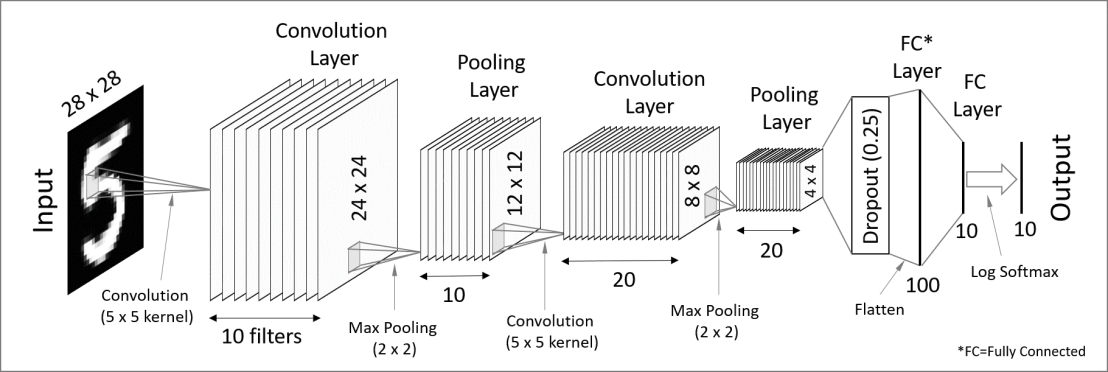

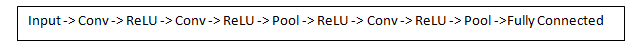

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras import backend as K

print(X_train.shape)

#create model
model = Sequential()


#add model layers
model.add(Conv2D(10,kernel_size=5, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(20, kernel_size=5, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())


#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

#Evaluating the model

loss, accuracy = model.evaluate(X_test, y_test, verbose=2)

print()
print("Test Loss", loss)
print("Test Accuracy", accuracy)

# Doing predictions

predicted_classes = model.predict_classes(X_test)

# see which we predicted correctly and which not ----- Indices of elements that are non-zero.

correct_indices = np.nonzero(predicted_classes == y_test1)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test1)[0]

print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

(49000, 28, 28, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 10)        260       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 20)          5020      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 20)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 20)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 320)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                32